# Рубежный контроль №1
**Студент**: Хуан Яовэнь   
**Группа**: ИУ5И-21М   
**Вариант**: 18   
**Задачи**: 18, 38  
**Дополнительные требования по группам**: Диаграмма рассеяния

# 1. Задача №18
Для набора данных проведите масштабирование данных для одного (произвольного) числового признака на основе Z-оценки.

Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
color=sns.color_palette()
sns.set_style('darkgrid')
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))
%matplotlib inline

Импортировать набор данных.Набор данных взят из прогнозов ожидаемой продолжительности жизни в мире на 2015 год из статистики Всемирного банка. В наборе данных есть континент, к которому принадлежит страна, плотность населения и ВВП на душу населения. 

In [41]:
dataset=pd.read_csv('WorldIndex.csv')
df=dataset.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          164 non-null    object 
 1   Continent        164 non-null    object 
 2   Life_expectancy  164 non-null    float64
 3   GDP_per_capita   164 non-null    float64
 4   Population       164 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.043,4132.760,39871528.000
1,Angola,Africa,52.666,3695.794,27859305.000
2,Benin,Africa,59.721,783.947,10575952.000
3,Botswana,Africa,64.487,6532.061,2209197.000
4,Burundi,Africa,57.107,303.681,10199270.000


Просмотрите график рассеяния перед масштабированием

<AxesSubplot:xlabel='GDP_per_capita', ylabel='Life_expectancy'>

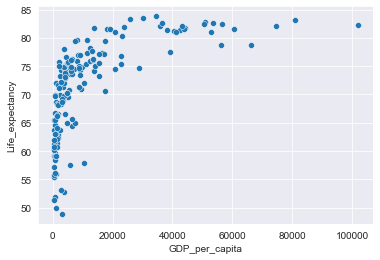

In [4]:
sns.scatterplot(x='GDP_per_capita',y='Life_expectancy',data=df)

Масштабирование данных на основе Z-оценки

C:\Users\23882\AppData\Local\Temp\ipykernel_20392\3346251329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Life_expectancy']=scaler.fit_transform(df['Life_expectancy'].values.reshape(-1,1))


<AxesSubplot:xlabel='GDP_per_capita', ylabel='Life_expectancy'>

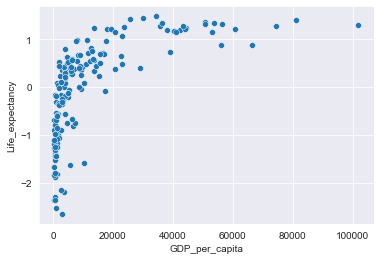

In [5]:
import sklearn.preprocessing
scaler=sklearn.preprocessing.StandardScaler()
df['Life_expectancy']=scaler.fit_transform(df['Life_expectancy'].values.reshape(-1,1))
sns.scatterplot(x='GDP_per_capita',y='Life_expectancy',data=df)

# 2. Задача №38.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 10 лучших признаков, и метод, основанный на взаимной информации.

Импортируйте новый набор данных, набор данных с веб-сайта kaggle. Набор данных касается качества вина и содержит такие переменные, как содержание алкоголя, pH и качество вина. 

In [6]:
dataset_2=pd.read_csv('winequality-red.csv')
dataset_2.info()
dataset_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [7]:
X=dataset_2.drop(labels=['quality'],axis=1)
y=dataset_2.quality

In [8]:
X.shape

(1599, 11)

Импорт библиотек

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

Text(0, 0.5, 'Взаимная информация')

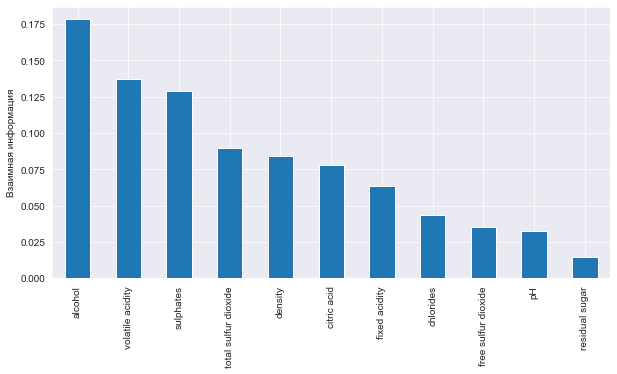

In [39]:
mi = mutual_info_regression(X,y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [33]:
selector=SelectKBest(mutual_info_regression,k=10)
selector.fit(X,y)
X_selected=selector.transform(X)
X_selected.shape

(1599, 10)

In [34]:
selector.get_support(indices=False)

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [35]:
X.columns[selector.get_support()]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

Признаки, выбранные серектором:'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol'

<AxesSubplot:>

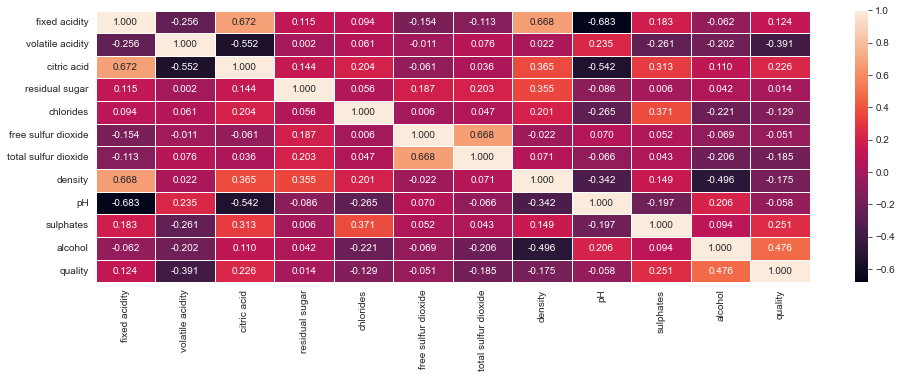

In [36]:
plt.figure(figsize = (16,5))
sns.heatmap(dataset_2.corr(), annot=True, linewidth=1,fmt='.3f')

Корреляция каждого признака с качеством